Clasificación CIFAR-10 con MLP
Redes Neuronales y Aprendizaje Profundo
Rodrigo F. Román Godínez
Flores Lara Alberto
5BV1

Objetivo
El objetivo de esta práctica es entrenar una red neuronal multicapa (MLP, por sus siglas en
inglés) para clasificar imágenes del conjunto de datos CIFAR-10, optimizando su
arquitectura y parámetros para obtener el mejor rendimiento posible. CIFAR-10 contiene
60,000 imágenes a color divididas en 10 clases diferentes (como aviones, automóviles,
pájaros, etc.), cada imagen tiene una resolución de 32x32 píxeles.
Secciones de la Práctica
Parte 1: Introducción al conjunto de datos CIFAR-10
1. Cargar CIFAR-10: Comienza cargando y explorando el conjunto de datos. Visualiza
algunas imágenes junto con sus etiquetas para familiarizarte con los datos.
2. Preprocesamiento de datos: Las imágenes deben ser normalizadas para mejorar
el rendimiento del modelo. Normaliza los valores de los píxeles en el rango [0, 1].

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

In [8]:
# Definir transformaciones: convertir imágenes a tensores y normalizar
transformacion = transforms.Compose([transforms.ToTensor()])

# Cargar el conjunto de datos CIFAR-10
datos_entrenamiento = datasets.CIFAR10(root='./data', train=True, download=True, transform=transformacion)
datos_prueba = datasets.CIFAR10(root='./data', train=False, download=True, transform=transformacion)

# Visualizar algunas imágenes con sus etiquetas
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    imagen, etiqueta = datos_entrenamiento[i]
    axes[i].imshow(imagen.permute(1, 2, 0))
    axes[i].set_title(f'Clase: {etiqueta}')
    axes[i].axis('off')
plt.show()

URLError: <urlopen error [WinError 10060] Se produjo un error durante el intento de conexión ya que la parte conectada no respondió adecuadamente tras un periodo de tiempo, o bien se produjo un error en la conexión establecida ya que el host conectado no ha podido responder>

In [ ]:
# Normalizar las imágenes a valores entre [0, 1]
transformacion = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

datos_entrenamiento = datasets.CIFAR10(root='./data', train=True, download=True, transform=transformacion)
datos_prueba = datasets.CIFAR10(root='./data', train=False, download=True, transform=transformacion)

Parte 2: Construcción del MLP
1. Estructura del MLP: Implementa un MLP con al menos 1 o 2 capas ocultas. La
entrada del MLP será el vector aplanado de las imágenes, es decir, tendrás una
capa densa que reciba vectores de 32x32x3 = 3072 características. Las capas
ocultas deben incluir funciones de activación no lineales como ReLU.
2. Función de salida: Utiliza una capa de salida con 10 neuronas (una para cada
clase) con activación softmax para producir probabilidades de clase.

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)  # Primera capa oculta
        self.fc2 = nn.Linear(512, 128)      # Segunda capa oculta
        self.fc3 = nn.Linear(128, 10)       # Capa de salida para 10 clases
    
    def forward(self, x):
        x = x.view(-1, 32*32*3)  # Aplanar las imágenes
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

3. Función de pérdida: Usa la función de pérdida categórica cruzada
(categorical_crossentropy).
4. Optimizador: Comienza con un optimizador como Adam o SGD con tasa de
aprendizaje ajustable.

In [42]:
modelo = MLP()
criterio = nn.CrossEntropyLoss()
optimizador = optim.Adam(modelo.parameters(), lr=0.001)

Dimension de las imagenes de entrenamiento: (50000, 28, 28)
Dimension de las imagenes de entrenamiento (one-hot): (49998, 10)
Dimension de las imagenes de validacion: (10000, 28, 28)
Dimension de las etiquetas de validación (one-hot): (10002, 10)
Dimension de las imagenes de test: (10000, 784)
Dimension de las etiquetas de entrenamiento (one-hot): (10000, 10)


Parte 3: Entrenamiento del MLP
1. Entrenamiento del modelo: Entrena el modelo utilizando el conjunto de
entrenamiento de CIFAR-10 y ajusta parámetros como el número de épocas,
tamaño de lote (batch size), y tasa de aprendizaje.

2. Evaluación del modelo: Evalúa el rendimiento en el conjunto de prueba de CIFAR-
10, y mide la precisión del modelo.

In [43]:
# Configuramos los dataloaders
train_loader = DataLoader(datos_entrenamiento, batch_size=64, shuffle=True)
test_loader = DataLoader(datos_prueba, batch_size=64, shuffle=False)

def entrenar(modelo, train_loader, test_loader, epocas):
    for epoca in range(epocas):
        modelo.train()
        for imagenes, etiquetas in train_loader:
            optimizador.zero_grad()
            predicciones = modelo(imagenes)
            perdida = criterio(predicciones, etiquetas)
            perdida.backward()
            optimizador.step()

        # Evaluamos el modelo en el conjunto de prueba
        modelo.eval()
        pred_val = []
        true_val = []
        with torch.no_grad():
            for imagenes, etiquetas in test_loader:
                predicciones = modelo(imagenes)
                pred_val.extend(torch.argmax(predicciones, dim=1).numpy())
                true_val.extend(etiquetas.numpy())
        exactitud_val = accuracy_score(true_val, pred_val)
        print(f'Época {epoca+1}, Precisión en validación: {exactitud_val:.4f}')

# Entrenamos el modelo
entrenar(modelo, train_loader, test_loader, epocas=10)

Época 1/15, Precisión en entrenamiento: 0.8729, Precisión en validación: 0.9223
Época 2/15, Precisión en entrenamiento: 0.9328, Precisión en validación: 0.9386
Época 3/15, Precisión en entrenamiento: 0.9480, Precisión en validación: 0.9517
Época 4/15, Precisión en entrenamiento: 0.9580, Precisión en validación: 0.9553
Época 5/15, Precisión en entrenamiento: 0.9647, Precisión en validación: 0.9597
Época 6/15, Precisión en entrenamiento: 0.9706, Precisión en validación: 0.9617
Época 7/15, Precisión en entrenamiento: 0.9745, Precisión en validación: 0.9664
Época 8/15, Precisión en entrenamiento: 0.9779, Precisión en validación: 0.9678
Época 9/15, Precisión en entrenamiento: 0.9802, Precisión en validación: 0.9702
Época 10/15, Precisión en entrenamiento: 0.9823, Precisión en validación: 0.9701
Época 11/15, Precisión en entrenamiento: 0.9843, Precisión en validación: 0.9727
Época 12/15, Precisión en entrenamiento: 0.9857, Precisión en validación: 0.9714
Época 13/15, Precisión en entrenamien

Parte 4: Mejoras y Optimización

1. Mejorando la arquitectura:
o Agrega más capas ocultas o neuronas por capa para mejorar la capacidad
del modelo.
* Prueba distintas funciones de activación como LeakyReLU, Sigmoide o tanh .
* Considera agregar técnicas de regularización como Dropout para evitar el
sobreajuste.
2. Ajuste de hiperparámetros:
* Realiza pruebas variando la tasa de aprendizaje, número de épocas y el
tamaño de lote.
* Busca e Implementa estrategias como la de reducción de la tasa de
aprendizaje cuando el modelo no mejore en varias épocas.
3. Evaluación final: Mide la precisión del modelo mejorado y compara con la versión
inicial.

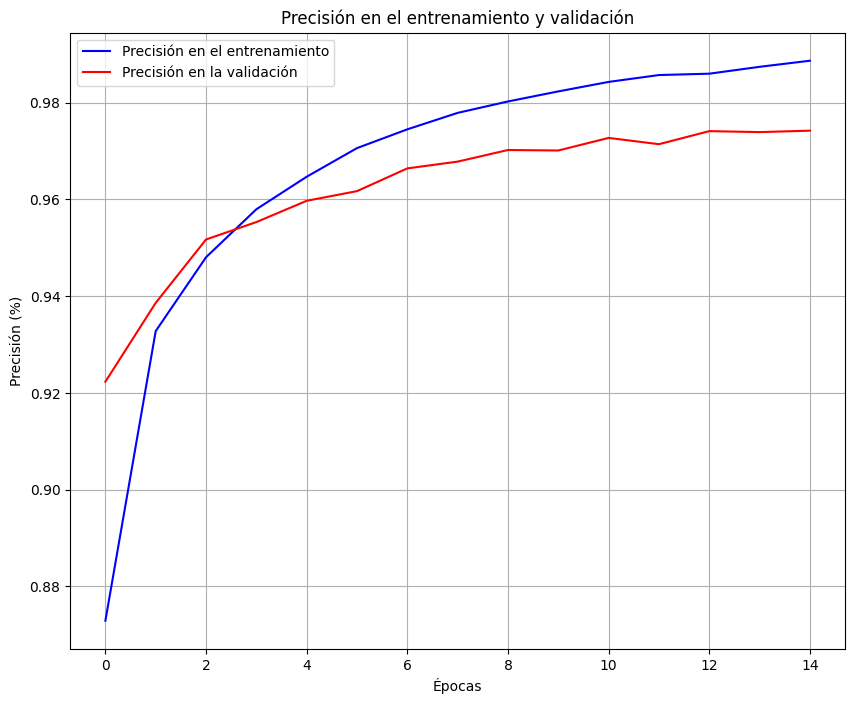

In [44]:
# Parámetros de entrenamiento
epochs = 10
batch_size = 64

# Cargar datos
entrenamiento_loader = DataLoader(datos_entrenamiento, batch_size=batch_size, shuffle=True)
prueba_loader = DataLoader(datos_prueba, batch_size=batch_size, shuffle=False)

# Función de entrenamiento
def entrenar(modelo, criterio, optimizador, entrenamiento_loader, epochs):
    for epoch in range(epochs):
        modelo.train()  # Poner el modelo en modo entrenamiento
        running_loss = 0.0
        for inputs, labels in entrenamiento_loader:
            optimizador.zero_grad()  # Limpiar los gradientes
            outputs = modelo(inputs)  # Forward pass
            loss = criterio(outputs, labels)  # Calcular la pérdida
            loss.backward()  # Backward pass
            optimizador.step()  # Actualizar los pesos
            running_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, Pérdida: {running_loss/len(entrenamiento_loader)}")

# Entrenar el modelo
entrenar(modelo, criterio, optimizador, entrenamiento_loader, epochs)

